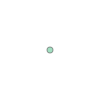

In [3]:
from shapely import Point

point = Point(2.2, 4.2)
point3D = Point(9.26, -2.456, 0.57)
point

In [4]:
print(point)
print(point3D)

POINT (2.2 4.2)
POINT Z (9.26 -2.456 0.57)


In [5]:
point.wkt

'POINT (2.2 4.2)'

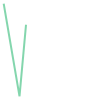

In [6]:
from shapely import Point, LineString

point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)

line = LineString([point1, point2, point3])
line_from_tuples = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
line

In [7]:

line.wkt

'LINESTRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456)'

In [8]:
list(line.coords)

[(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)]

In [9]:
xcoords = list(line.xy[0])
ycoords = list(line.xy[1])

print(xcoords)
print(ycoords)

[2.2, 7.2, 9.26]
[4.2, -25.1, -2.456]


In [10]:
length = line.length
centroid = line.centroid
print(f"Length of our line: {length:.2f} units")
print(f"Centroid: {centroid}")

Length of our line: 52.46 units
Centroid: POINT (6.229961354035622 -11.892411157572392)


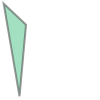

In [11]:
from shapely import Polygon

poly = Polygon([point1, point2, point3])
poly

In [12]:
poly.wkt

'POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))'

In [13]:
# Define the exterior coordinates
exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]

# Define the hole coordinates (a single hole in this case)
holes_coordinates = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

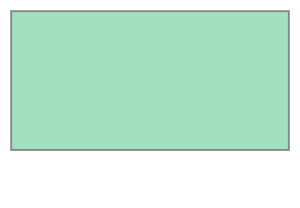

In [14]:
poly_without_hole = Polygon(shell=exterior)
poly_without_hole

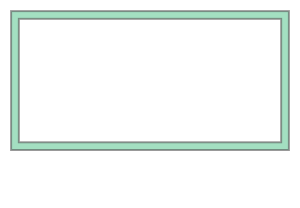

In [15]:
poly_with_hole = Polygon(shell=exterior, holes=holes_coordinates)
poly_with_hole

In [16]:
print("Polygon centroid: ", poly.centroid)
print("Polygon Area: ", poly.area)
print("Polygon Bounding Box: ", poly.bounds)
print("Polygon Exterior: ", poly.exterior)
print("Polygon Exterior Length: ", poly.exterior.length)

Polygon centroid:  POINT (6.22 -7.785333333333334)
Polygon Area:  86.789
Polygon Bounding Box:  (2.2, -25.1, 9.26, 4.2)
Polygon Exterior:  LINEARRING (2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2)
Polygon Exterior Length:  62.16395199996553


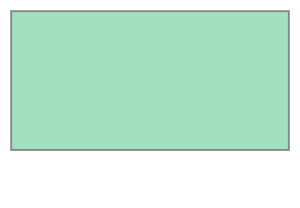

In [17]:
from shapely.geometry import box

min_x, min_y = -180, -90
max_x, max_y = 180, 90
box_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
box_poly

In [18]:
box_poly.wkt

'POLYGON ((180 -90, 180 90, -180 90, -180 -90, 180 -90))'

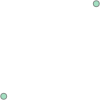

In [19]:
from shapely import MultiPoint, MultiLineString, MultiPolygon

multipoint = MultiPoint([Point(2, 2), Point(3, 3)])
multipoint

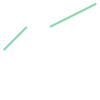

In [20]:
multiline = MultiLineString(
    [LineString([(2, 2), (3, 3)]), LineString([(4, 3), (6, 4)])]
)
multiline

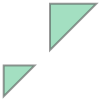

In [21]:
multipoly = MultiPolygon(
    [Polygon([(0, 0), (0, 4), (4, 4)]), Polygon([(6, 6), (6, 12), (12, 12)])]
)
multipoly

In [ ]:
вправи

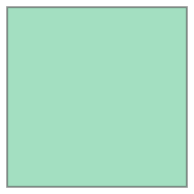

In [22]:
from shapely.geometry import box

min_x, min_y = -90, -90
max_x, max_y = 90, 90
box_poly = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
box_poly

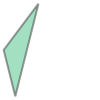

In [23]:
from shapely import Polygon
point1=(1,3)
point2=(4,7)
point3=(2,-1)
poly = Polygon([point1, point2, point3])
poly

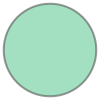

In [31]:
from shapely.geometry import Point


circle = Point(0, 0).buffer(15)
circle


In [32]:
from pathlib import Path

data_folder = Path("_data", "Austin")
fp = data_folder / "austin_pop_2019.gpkg"
print(fp)

_data\Austin\austin_pop_2019.gpkg


In [35]:
import geopandas as gpd

data = gpd.read_file(fp)

In [36]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [37]:
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


<Axes: >

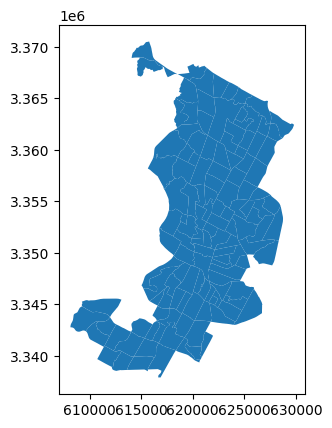

In [39]:
data.plot()

In [47]:
len(data)

130

In [52]:
number_of_centrus=data['tract'].nunique
print(number_of_centrus)


<bound method IndexOpsMixin.nunique of 0      002422
1      001751
2      002411
3      000401
4      002313
        ...  
125    001812
126    002312
127    002112
128    002110
129    002113
Name: tract, Length: 130, dtype: object>


In [57]:
total_pop=data['pop2019'].sum()
print(total_pop)

611935.0


In [40]:
data.geometry.head()

0    POLYGON ((615643.487 3338728.496, 615645.477 3...
1    POLYGON ((618576.586 3359381.053, 618614.33 33...
2    POLYGON ((619200.163 3341784.654, 619270.849 3...
3    POLYGON ((621623.757 3350508.165, 621656.294 3...
4    POLYGON ((621630.247 3345130.744, 621717.926 3...
Name: geometry, dtype: geometry

In [41]:
type(data.geometry)

geopandas.geoseries.GeoSeries

In [42]:
data.geometry.area

0      4.029772e+06
1      1.532030e+06
2      3.960344e+06
3      2.181762e+06
4      2.431208e+06
           ...     
125    2.321182e+06
126    4.388407e+06
127    1.702764e+06
128    3.540893e+06
129    2.054702e+06
Length: 130, dtype: float64

In [43]:
data["area_km2"] = data.area / 1000000
data.head()

,pop2019,tract,geometry,area_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",1.532030
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208


<Axes: >

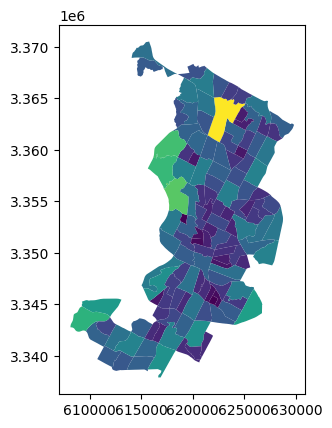

In [44]:
data.plot(column="area_km2")

In [58]:
data["pop_density_km2"] = data["pop2019"] / data["area_km2"]

avg_density = data["pop_density_km2"].mean()

max_density = data["pop_density_km2"].max()

print("Average population density in 2019:", avg_density)
print("Maximum population density per census tract:", max_density)

Average population density in 2019: 2396.9319576508337
Maximum population density per census tract: 11323.842142217982


In [45]:
data.head()

,pop2019,tract,geometry,area_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33...",1.532030
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208


In [59]:
# Create a output path for the data
output_fp = "_data/austin_pop_density_2019.gpkg"

# Write the file
data.to_file(output_fp)

In [60]:
output_fp = "_data/austin_pop_density_2019.fgb"

# Write the file
data.to_file(output_fp, driver="FlatGeobuf")

In [64]:
import pandas as pd
td=pd.read_csv("_data/austin_pop_density_2019.fgb")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 72: invalid start byte

In [65]:
import geopandas as gpd
import pyogrio

available_drivers = pyogrio.list_drivers()

print(available_drivers)
len(available_drivers)

{'PCIDSK': 'rw', 'PDS4': 'rw', 'VICAR': 'rw', 'PDF': 'rw', 'MBTiles': 'rw', 'EEDA': 'r', 'OGCAPI': 'r', 'ESRI Shapefile': 'rw', 'MapInfo File': 'rw', 'UK .NTF': 'r', 'LVBAG': 'r', 'OGR_SDTS': 'r', 'S57': 'rw', 'DGN': 'rw', 'OGR_VRT': 'r', 'Memory': 'rw', 'CSV': 'rw', 'GML': 'rw', 'GPX': 'rw', 'KML': 'rw', 'GeoJSON': 'rw', 'GeoJSONSeq': 'rw', 'ESRIJSON': 'r', 'TopoJSON': 'r', 'OGR_GMT': 'rw', 'GPKG': 'rw', 'SQLite': 'rw', 'WAsP': 'rw', 'OpenFileGDB': 'rw', 'DXF': 'rw', 'FlatGeobuf': 'rw', 'Geoconcept': 'rw', 'GeoRSS': 'rw', 'VFK': 'r', 'PGDUMP': 'rw', 'OSM': 'r', 'GPSBabel': 'rw', 'OGR_PDS': 'r', 'WFS': 'r', 'OAPIF': 'r', 'EDIGEO': 'r', 'SVG': 'r', 'Idrisi': 'r', 'ODS': 'rw', 'XLSX': 'rw', 'Elasticsearch': 'rw', 'Carto': 'rw', 'AmigoCloud': 'rw', 'SXF': 'r', 'Selafin': 'rw', 'JML': 'rw', 'PLSCENES': 'r', 'CSW': 'r', 'VDV': 'rw', 'MVT': 'rw', 'NGW': 'rw', 'MapML': 'rw', 'GTFS': 'r', 'PMTiles': 'rw', 'JSONFG': 'rw', 'MiraMonVector': 'rw', 'TIGER': 'r', 'AVCBin': 'r', 'AVCE00': 'r', 'HTTP'

65

In [66]:
# Read Esri Shapefile
fp = data_folder / "austin_pop_2019.shp"
data = gpd.read_file(fp)
data.head()

,fid,pop2019,tract,geometry
0,1.0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2.0,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.33 33..."
2,3.0,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4.0,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,5.0,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


In [67]:
# Read file from Geopackage
fp = data_folder / "austin_pop_2019.gpkg"
data = gpd.read_file(fp)

# Read file from GeoJSON
fp = data_folder / "austin_pop_2019.geojson"
data = gpd.read_file(fp)

# Read file from Geodatabase
fp = data_folder / "austin_pop_2019.gdb"
data = gpd.read_file(fp)

# Read file from KML
fp = "_data/Austin/austin_pop_2019.kml"
data_kml = gpd.read_file(fp)

# Read file from MapInfo TAB
fp = data_folder / "austin_pop_2019.tab"
data = gpd.read_file(fp)

data.head()

,fid,pop2019,tract,geometry
0,1.0,6070.0,002422,"POLYGON ((615643.49 3338728.49, 615645.48 3338..."
1,2.0,2203.0,001751,"POLYGON ((618576.59 3359381.06, 618614.33 3359..."
2,3.0,7419.0,002411,"POLYGON ((619200.16 3341784.65, 619270.85 3341..."
3,4.0,4229.0,000401,"POLYGON ((621623.75 3350508.16, 621656.29 3350..."
4,5.0,4589.0,002313,"POLYGON ((621630.24 3345130.75, 621717.92 3345..."


In [68]:
# Read spesific layer from Geopackage
fp = data_folder / "austin_pop_2019.gpkg"
data = gpd.read_file(fp, layer="austin_pop_2019")

In [69]:
#| echo: true
data_kml.head()

,Name,Description,geometry
0,,,"POLYGON Z ((-97.79891 30.17448 0, -97.79888 30..."
1,,,"POLYGON Z ((-97.76612 30.36053 0, -97.76572 30..."
2,,,"POLYGON Z ((-97.76163 30.20171 0, -97.76089 30..."
3,,,"POLYGON Z ((-97.73545 30.28017 0, -97.73511 30..."
4,,,"POLYGON Z ((-97.736 30.23166 0, -97.7351 30.23..."


In [70]:
#| echo: true
data = data_kml[["pop2019", "tract", "geometry"]].copy()
data.head(2)

KeyError: "['pop2019', 'tract'] not in index"

In [72]:
from zipfile import ZipFile

fp = "_data/Helsinki/building_points_helsinki.zip"

with ZipFile(fp) as z:
    print(z.namelist())

['building_points_helsinki.gpkg']


In [75]:
buildings = gpd.read_file(fp)
buildings.head(2)

DataSourceError: '/vsizip/_data/Helsinki/Kamppi_layers.zip' not recognized as being in a supported file format.; It might help to specify the correct driver explicitly by prefixing the file path with '<DRIVER>:', e.g. 'CSV:path'.

In [73]:
fp = "_data/Helsinki/Kamppi_layers.zip"

with ZipFile(fp) as z:
    print(z.namelist())

['natural/', 'natural/Kamppi_parks.gpkg', 'built_environment/', 'built_environment/Kamppi_buildings.gpkg', 'built_environment/Kamppi_roads.gpkg']


In [77]:
parks_fp = "_data/Helsinki/Kamppi_layers.zip!natural/Kamppi_parks.gpkg"

parks = gpd.read_file(parks_fp)
parks.head(2)

,osmid,leisure,name,geometry
0,8042256,park,Pikkuparlamentin puisto,"POLYGON ((385464.223 6672281.159, 385464.274 6..."
1,8042613,park,Simonpuistikko,"POLYGON ((385532.543 6672073.355, 385490.887 6..."


<Axes: >

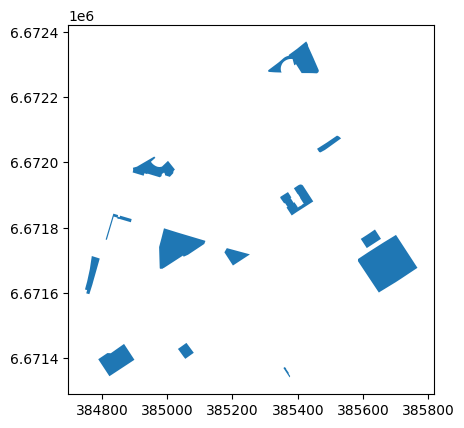

In [79]:
parks.plot()

In [81]:
from shapely.geometry import Polygon

coordinates = [
    (24.950899, 60.169158),
    (24.953492, 60.169158),
    (24.953510, 60.170104),
    (24.950958, 60.169990),
]

poly = Polygon(coordinates)

In [82]:
newdata = gpd.GeoDataFrame(geometry=[poly])
newdata

,geometry
0,"POLYGON ((24.9509 60.16916, 24.95349 60.16916,..."


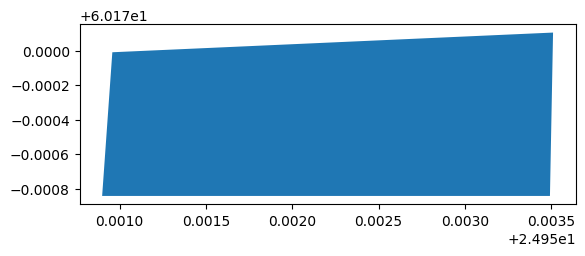

In [83]:
newdata.plot();

In [84]:
gdf_data = {
    "geometry": [poly],
    "name": "Senate Square",
    "city": "Helsinki",
    "year": 2023,
}
new_data_extended = gpd.GeoDataFrame(gdf_data)
new_data_extended

,geometry,name,city,year
0,"POLYGON ((24.9509 60.16916, 24.95349 60.16916,...",Senate Square,Helsinki,2023


In [89]:
import pandas as pd

airports = pd.read_csv(
    "_data/airports.txt",
    usecols=["Airport ID", "Name", "City", "Country", "Latitude", "Longitude"],
)
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001


In [91]:
airports["geometry"] = gpd.points_from_xy(
    x=airports["Longitude"], y=airports["Latitude"]
)

airports = gpd.GeoDataFrame(airports)
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude,geometry
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,POINT (145.392 -6.08169)
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001,POINT (145.789 -5.20708)
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005,POINT (144.29601 -5.82679)
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977,POINT (146.72598 -6.5698)
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001,POINT (147.22 -9.44338)


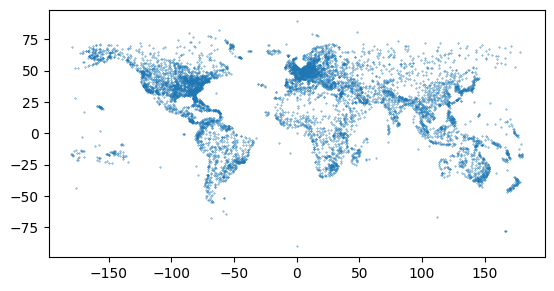

In [92]:
airports.plot(markersize=0.1);